<a href="https://colab.research.google.com/github/AmtulYasmeen/Projects-Done/blob/Pytorch/image_preprocessing_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('image-classification-using-pytorch')
jovian.set_colab_id('1csL9x7M1XNoG4-ZCX-iBVAjRW4M9LiiS')

     |████████████████████████████████| 71kB 5.4MB/s 


In [ ]:
!pip install jovian --upgrade --quiet

#Image Preprocessing

In [ ]:
'''unique aspect ratio : width to height of the img ratio #perform center crop to keep imp part of img
uniform image size : same size to be fed to nn , fit the img size to feature maps, by down-scaling or up-scaling
mean and perturbed img : to perturb input img, intentionally distort pixel by varying them from mean image, make cnn more robust
cal mean of img by calc the avg pixel value across the training dataset
normalize input img: pixel value btw 0 and 1, subtract mean and divide by std., help pixel to have similar data distribution
dimensionality reduction: rgb has 3 channels, reduce it to grey scale with 1 channel
data augmentation: perturbed img are a form of data augmentations, scaling,rotation, affine transforms, reduces overfittng
'''


'unique aspect ratio : width to height of the img ratio #perform center crop to keep imp part of img\nuniform image size : same size to be fed to nn , fit the img size to feature maps, by down-scaling or up-scaling\nmean and perturbed img : to perturb input img, intentionally distort pixel by varying them from mean image, make cnn more robust\ncal mean of img by calc the avg pixel value across the training dataset\nnormalize input img: pixel value btw 0 and 1, subtract mean and divide by std., help pixel to have similar data distribution\ndimensionality reduction: rgb has 3 channels, reduce it to grey scale with 1 channel\ndata augmentation: perturbed img are a form of data augmentations, scaling,rotation, affine transforms, reduces overfittng\n'

In [ ]:
# setting up a vm in gcp for dl
# 

In [ ]:
# img preprocessing techniques


In [ ]:
import skimage
from skimage import data
from skimage import transform
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
bird = mpimg.imread("/content/pic2.jpg")

In [ ]:
def show_img(img, name='img', cmap = None):
  if cmap == 'gray':
    plt.figure(figsize=(6,6))
    plt.title(f'{name}')
    plt.imshow(img, cmap = 'gray')
  else:
    plt.figure(figsize=(6,6))
    plt.title(f'{name}')
    plt.imshow(img)

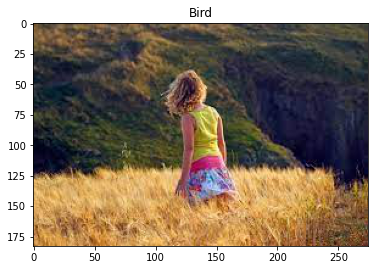

In [ ]:
show_img(bird, 'Bird' )

In [ ]:
bird.shape

(183, 275, 3)

In [ ]:
bird[100:150, 200:225]

array([[[107, 106,  52],
        [104, 102,  61],
        [ 87,  83,  58],
        ...,
        [ 11,   8,  39],
        [ 11,   8,  39],
        [ 20,  16,  53]],

       [[130, 131,  55],
        [122, 121,  57],
        [110, 106,  61],
        ...,
        [ 11,   8,  39],
        [ 11,   8,  39],
        [ 18,  14,  51]],

       [[126, 128,  45],
        [115, 112,  41],
        [100,  93,  38],
        ...,
        [  9,   9,  37],
        [ 10,  10,  38],
        [ 15,  11,  48]],

       ...,

       [[214, 162,  86],
        [215, 164,  85],
        [221, 170,  91],
        ...,
        [218, 174,  85],
        [227, 183,  94],
        [205, 162,  83]],

       [[207, 158,  82],
        [220, 171,  94],
        [237, 188, 111],
        ...,
        [210, 163,  73],
        [220, 173,  83],
        [171, 129,  47]],

       [[198, 150,  76],
        [224, 176, 100],
        [234, 186, 110],
        ...,
        [218, 169,  77],
        [223, 174,  82],
        [183, 143,  58]]

In [ ]:
bird_reshape = bird.reshape(bird.shape[0], -1)
bird_reshape.shape

(183, 825)

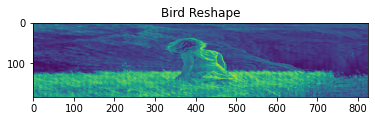

In [ ]:
show_img(bird_reshape, 'Bird Reshape')

In [ ]:
bird_resized = skimage.transform.resize(bird, (150,150))
bird_resized.shape

(150, 150, 3)

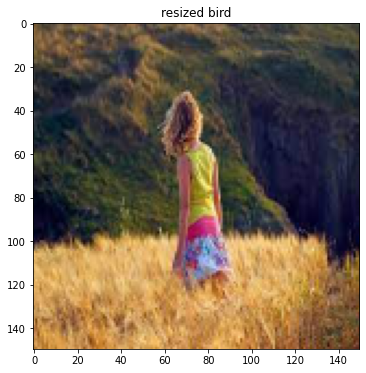

In [ ]:
show_img(bird_resized,'resized bird')

In [ ]:
# checking  the aspect ratio of imgs
# width/height
aspect_ratio_original = bird.shape[1] / float(bird.shape[0])
aspect_ratio_resized = bird_resized.shape[1] / float(bird_resized.shape[0])
print(aspect_ratio_original,'-------------------', aspect_ratio_resized)

1.5027322404371584 ------------------- 1.0


In [ ]:
# rescaling the original img st the aspect ratio is preserved
# .rescale(img, (ht, width))
bird_rescaled = skimage.transform.rescale(bird_resized, (1.0, aspect_ratio_original), multichannel=True)
bird_rescaled.shape

(150, 225, 3)

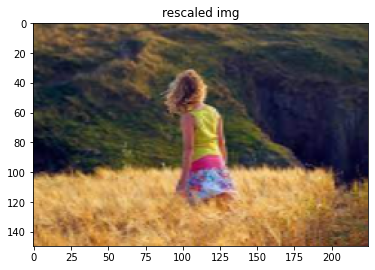

In [ ]:
show_img(bird_rescaled, 'rescaled img')

In [ ]:
# rescaled img aspect ratio is maintained same as original img
aspect_ratio_rescaled = bird_rescaled.shape[1] / float(bird_rescaled.shape[0])
print('rescaled img aspect ratio :', aspect_ratio_rescaled )

rescaled img aspect ratio : 1.5


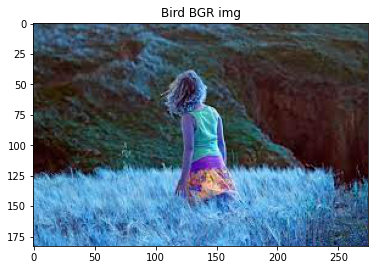

In [ ]:
# swithc aroung the channels in an img
bird_BGR = bird[:,:,[2,1,0]]
show_img(bird_BGR, 'Bird BGR img')

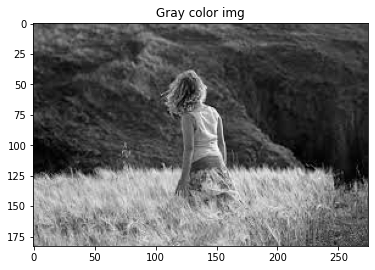

In [ ]:
# convert multi channel img to grey scale or single channel
bird_grey = skimage.color.rgb2gray(bird)
show_img(bird_grey, 'Gray color img', cmap = 'gray')

In [ ]:
# the last dim of img is squeezed therefore the shape of gray img is 2 dim
bird_grey.shape

(183, 275)

In [ ]:
from skimage import io

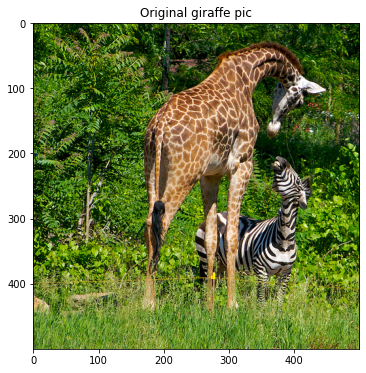

In [ ]:
giraffe = skimage.img_as_float(skimage.io.imread('/content/giraffe.jpg')).astype(np.float32)
show_img(giraffe, 'Original giraffe pic')

In [ ]:
giraffe.shape

(500, 500, 3)

In [ ]:
# crop to focus on imp areas of img
def crop(image, cropx, cropy):
  y , x ,c = image.shape

  startx = x//2 - (cropx//8)
  starty = y//3 - (cropy //4)

  stopx = startx + cropx
  stopy = starty + 2*cropy

  return image[starty:stopy, startx:stopx]


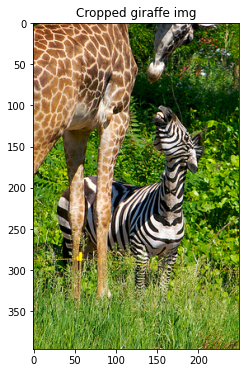

In [ ]:
giraffe_cropped = crop(giraffe, 250, 250)
show_img(giraffe_cropped, 'Cropped giraffe img')

In [ ]:
# denoising noisy image

from skimage.util import random_noise


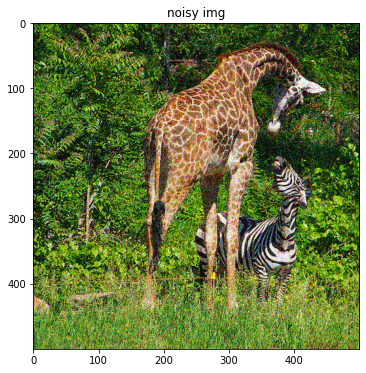

In [ ]:
# adding gaussian noise to giraffe img

sigma = 0.155
noisy_giraffe = random_noise(giraffe, var = sigma**2)
show_img(noisy_giraffe, 'noisy img')

In [ ]:
# using denoising filters 
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma

In [ ]:
# estimate the noise in img
sigma_est = estimate_sigma(noisy_giraffe,
                           multichannel = True,
                           average_sigmas = True)
sigma_est
                      

0.14901315926781739

In [ ]:
# noise v close to 0.15 we used /

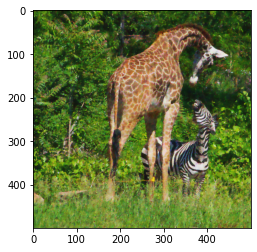

In [ ]:
plt.imshow(denoise_tv_chambolle(noisy_giraffe,
                                weight = 0.1,
                                multichannel = True)) #greater the weight the more denoising occurs

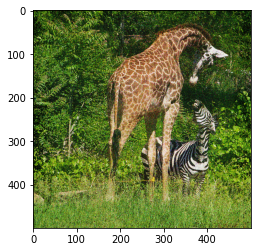

In [ ]:
# edge preserving filter, it averages pixel based on how close they are spatially and how similar thy are..
plt.imshow(denoise_bilateral(noisy_giraffe,
                             sigma_color = 0.05,
                             sigma_spatial = 15,
                             multichannel = True))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: As of scikit-image 0.16, automated rescaling of sigma to match any internal rescaling of the image is performed. Setting rescale_sigma to False, will disable this new behaviour. To avoid this warning the user should explicitly set rescale_sigma to True or False.
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


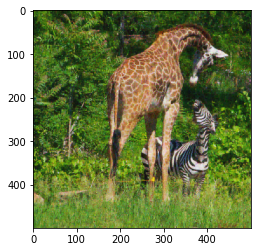

In [ ]:
# wavelet filer: transforms the img into another representation, a wavelet domain before denoising
plt.imshow(denoise_wavelet(noisy_giraffe, multichannel=True))


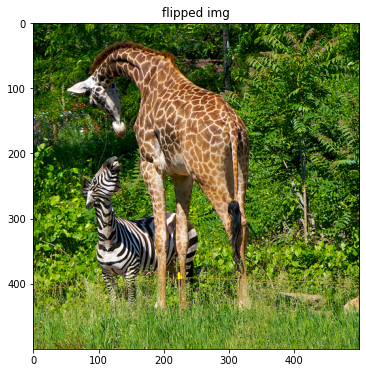

In [ ]:
# image filpping

giraffe_flip = np.fliplr(giraffe)
show_img(giraffe_flip, 'flipped img')

# Image Preprocessing using PyTorch 

In [ ]:
import pickle
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
# untar and unzip dataset file 
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -P datasets
!tar xf datasets/cifar-10-python.tar.gz -C datasets

--2021-03-24 15:28:57--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘datasets/cifar-10-python.tar.gz.1’

cifar-10-python.tar 100%[===================>] 162.60M  32.4MB/s    in 5.7s    

2021-03-24 15:29:03 (28.7 MB/s) - ‘datasets/cifar-10-python.tar.gz.1’ saved [170498071/170498071]



In [ ]:
# read in the cifar10 dataset from a single batch
with open('datasets/cifar-10-batches-py/data_batch_1', 'rb') as input_file:
  # pkl.load deserializes the file and save content in x variable
  X = pickle.load(input_file, encoding='latin1')

In [ ]:
X = X['data']

In [ ]:
X.shape

(10000, 3072)

In [ ]:
# 10k imgs and 32 x 32 x 3  #batch_size * height * width * channels

In [ ]:
# reshape into diff format
X =X.reshape(-1,3,32,32)
X.shape

(10000, 3, 32, 32)

In [ ]:
# change the representation of img dims,move the dims around use transpose

# original : batch_size, channels, height, width
# transposed : batch_size, height, width, channels

X= X.transpose(0,2,3,1)
X.shape

(10000, 32, 32, 3)

In [ ]:
# using reshape to go back to original formal 
X = X.reshape(-1, 3*32*32)

In [ ]:
X.shape

(10000, 3072)

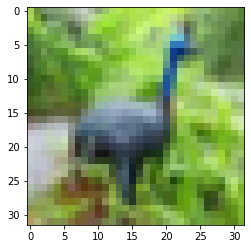

In [ ]:
plt.imshow(X[6].reshape(32,32,3))
plt.show()

In [ ]:
# center the data, by normalizing imgs, subtract mean and divide by std, imgs are centered around 0 and expressed in terms of z score or stds

X = X - X.mean(axis =0)
X = X / np.std(X, axis = 0)


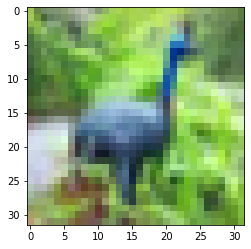

In [ ]:
# standardized img using min max scaler func
def minmax_scaler_img_show(i):
  i = i.reshape(32,32,3)
  m , M = i.min() , i.max()
  plt.imshow((i-m)/ (M-m))
  plt.show()
minmax_scaler_img_show(X[6])

In [ ]:
# whitening : used to de-corelate features in input images, computational intensive process, therefore done only on subset of data
X_subset = X[:100]

X_subset.shape

(100, 3072)

In [ ]:
# whitening .. decorrelating features in input images .. 
# zca whitening
# covariance is measure of strength of the relationship btw 2 variable
# its a data transformation s.t. its covariance matrix is identity matrix ..effect of whitening is to decorrelate features
cov = np.cov(X_subset, rowvar=True)
cov.shape

(100, 100)

In [ ]:
# extracting latent factors in  our cov matrix, they help in cal. the principal components of image features
# we decompose matrix using singular value decomposition  which performs factor anaysis
U,S,V = np.linalg.svd(cov)

In [ ]:
# svd gives latent factors
print(U.shape)
print(S.shape)
print(V.shape)

(100, 100)
(100,)
(100, 100)


In [ ]:
epsilon = 1e-5

In [ ]:
# this dot prodct help us calc pc of image features
zca_matrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T))

In [ ]:
zca_matrix.shape #contains the principal compponents of our image feature

(100, 100)

In [ ]:
# dot product or multiplying zca matrix containing PCs .. with the original images.. 
# result in whitening .. every img will have decorelated features
zca = np.dot(zca_matrix,X_subset)
zca.shape

(100, 3072)

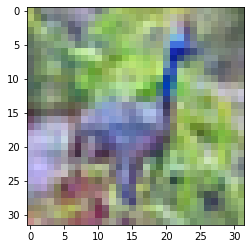

In [ ]:
standardized_img_show(zca[6])
# imgwith decorelated features

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# list of transformation to apply in pytorch
dir(transforms)

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'Enum',
 'F',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'List',
 'Normalize',
 'Optional',
 'PILToTensor',
 'Pad',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'Tensor',
 'ToPILImage',
 'ToTensor',
 'Tuple',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'math',
 'torch',
 'transforms']

In [ ]:
# transforms.Compose func allows us to specify transformations in a list or series

transform = transforms.Compose([
                                transforms.Resize(256),
                                transforms.ToTensor()])

In [ ]:
# instantiate builtin dataset and point to a root folder and apply transformations we specified
dataset = torchvision.datasets.CIFAR10(root='./datasets/cifar10/train', download = True, transform = transform)

Files already downloaded and verified


In [ ]:
dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./datasets/cifar10/train
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear)
               ToTensor()
           )

In [ ]:
# load in the data in batchs using Dataloader 
dataloader = torch.utils.data.DataLoader(dataset, 
                                         batch_size=16,
                                         shuffle=True,
                                         num_workers=2)


In [ ]:
# to load in the first batch of images using python iter func with out dataloader
images_batch, labels_batch = iter(dataloader).next()

In [ ]:
images_batch.shape

torch.Size([16, 3, 256, 256])

In [ ]:
labels_batch.shape

torch.Size([16])

In [ ]:
labels_batch

tensor([6, 3, 8, 2, 3, 6, 8, 1, 2, 1, 3, 3, 0, 6, 8, 0])

In [ ]:
# taking a look at all of the images in the batch by using make_grid util func
img = torchvision.utils.make_grid(images_batch)

In [ ]:
# it displays the imgs in 2 rows 
img.shape

torch.Size([3, 518, 2066])

In [ ]:
# moving channel to the last dim  for plting
img = np.transpose(img, (1,2,0))

In [ ]:
img.shape

torch.Size([518, 2066, 3])

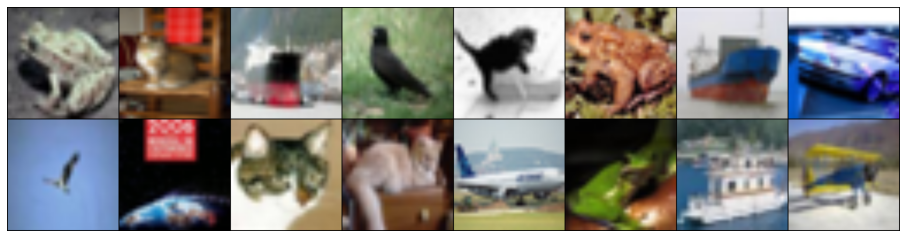

In [ ]:
plt.figure(figsize=(16,12))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# calculating mean and std of entire images in the dataset
# find mean and std of images, without loading the whole dataset in memory at once
# therefore we cal. mean and std of each batch of images and storing it in below vars

pop_mean = []
pop_std = []


In [ ]:
# accessing one batch of images and their mean and std
for i, data in enumerate(dataloader,0):
  numpy_image = data[0].numpy()
  # finding the mean value for each channel across all images in one batch
  # calc mean n std for each channel in all images in a batch
  batch_mean = np.mean(numpy_image, axis=(0,2,3)) # 0:batch, 1:channel, 2:height, 3: width
  batch_std = np.std(numpy_image,axis= (0,2,3))
  pop_mean.append(batch_mean)
  pop_std.append(batch_std)

# convert list into np array
pop_mean = np.array(pop_mean)
pop_std = np.array(pop_std)
# shape 
pop_mean.shape, pop_std.shape

((3125, 3), (3125, 3))

In [ ]:
# calc average of all the means taken for all batches
pop_mean = pop_mean.mean(axis=0)
pop_std = pop_std.mean(axis=0)

In [ ]:
# mean and std values of all images in dataset
print(pop_mean)
print(pop_std)

[0.49159136 0.48234624 0.44671997]
[0.23832054 0.23496972 0.25271034]


In [ ]:
# few tranforms to apply
transform = transforms.Compose([
                                transforms.Resize(256),
                                transforms.RandomResizedCrop(224),
                                transforms.ColorJitter(),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize(pop_mean,
                                                     pop_std)
])

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./datasets/cifar10/train', train= True,download=True, transform = transform)

Files already downloaded and verified


In [ ]:
# dataloader for creating batches
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle= True, num_workers=2)

In [ ]:
# accessing one batch
images_batch, labels_batch = iter(trainloader).next()

In [ ]:
images_batch.shape

torch.Size([16, 3, 224, 224])

In [ ]:
# making a grid of imgs to view
img = torchvision.utils.make_grid(images_batch)
img.shape

torch.Size([3, 454, 1810])

In [ ]:
# transposing for display in matplotlib
img = np.transpose(img,(1,2,0))
img.shape

torch.Size([454, 1810, 3])

In [ ]:
# scaling the pixels to lie btw 0 and 1
m,M = img.min(), img.max()
m,M

(tensor(-2.0627), tensor(2.2031))

In [ ]:
# scaling the normalized imgs to lie btw 0 and 1
img = (1/(abs(m)*M)) * img + 0.5 #pixels will be centered around 0.5 instead of 0

In [ ]:
img

tensor([[[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         ...,
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         ...,
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.4734, 0.5147, 0.5310],
         ...,
         [0.4589, 0.3421, 0.1998],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        ...,

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.4372, 0.4119, 0.4252],
         ...,
         [0.3937, 0.3604, 0.3330],
         [0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000]],

        [[0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000],
         [0.

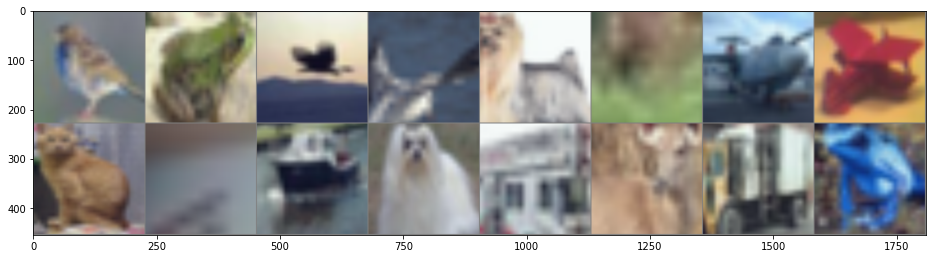

In [ ]:
plt.figure(figsize=(16,12))
plt.imshow(img)
plt.show()
# these imgs are normalised across entire dataset

In [ ]:
jovian.commit(project = 'image_preprocessing_pytorch') 

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/amtulyasmin/image-preprocessing-pytorch


'https://jovian.ai/amtulyasmin/image-preprocessing-pytorch'